In [105]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [165]:
# Visualize these universes and membership function

def fuzzy(heart_rate, blood_pressure, spo2_lvl, glucose_lvl, temperature, age):
    # Generate universe variables
    #   * variables have subjective ranges
    #   * each dicease has a range of [0, 100] in units of percentage points
    x_heart_rate = np.arange(0, 101, 1)
    x_blood_pressure = np.arange(0, 101, 1)
    x_spo2_level  = np.arange(0, 11, 1)
    x_glucose_level  = np.arange(0, 101, 1)
    x_temperature  = np.arange(0, 101, 1)
    x_age  = np.arange(0, 101, 1)

    x_hypoxemia  = np.arange(0, 11, 1)
    x_hypotension  = np.arange(0, 11, 1)
    x_hypertension  = np.arange(0, 11, 1)
    x_hyperthemia  = np.arange(0, 11, 1)
    x_diabetes  = np.arange(0, 11, 1)
    x_prediabetes  = np.arange(0, 11, 1)
    x_normoglycemia  = np.arange(0, 11, 1)
    x_hypoglycemia  = np.arange(0, 11, 1)
    x_stroke  = np.arange(0, 101, 1)
    x_kidney_failure  = np.arange(0, 11, 1)
    x_metabolism_syndrome  = np.arange(0, 11, 1)

    # 80 - 100 pulses/min safe region, max = 130 min = 0
    heart_rate_lo = fuzz.trimf(x_heart_rate, [0, 0, 65])
    heart_rate_md = fuzz.trimf(x_heart_rate, [62, 70, 77])
    heart_rate_hi = fuzz.trimf(x_heart_rate, [75, 100, 100])

    # 80 - 120 mmHg safe region, min = 0 max = 180(220-40) for age of 40
    blood_pressure_lo = fuzz.trimf(x_blood_pressure, [0, 0, 50])
    blood_pressure_md = fuzz.trimf(x_blood_pressure, [45, 56, 67])
    blood_pressure_hi = fuzz.trimf(x_blood_pressure, [62, 100, 100])

    # 94 - 99 safe region, max = 100 min = 90
    spo2_level_lo = fuzz.trimf(x_spo2_level, [0, 0, 5])
    spo2_level_md = fuzz.trimf(x_spo2_level, [4, 5, 10])
    spo2_level_hi = fuzz.trimf(x_spo2_level, [9, 10, 10])

    # 70 - 130 mgdL safe region, max = 200 min = 50
    glucose_level_lo = fuzz.trimf(x_glucose_level, [0, 0, 28])
    glucose_level_md = fuzz.trimf(x_glucose_level, [25, 33, 40])
    glucose_level_hi = fuzz.trimf(x_glucose_level, [37, 100, 100])

    # 35 - 38 centigrade safe region, max = 45 min = 15
    temperature_lo = fuzz.trimf(x_temperature, [0, 0, 49])
    temperature_md = fuzz.trimf(x_temperature, [0, 49, 100])
    temperature_hi = fuzz.trimf(x_temperature, [49, 100, 100])

    # max = 72 min = 10
    age_lo = fuzz.trimf(x_age, [0, 0, 15])
    age_md = fuzz.trimf(x_age, [7, 28, 50])
    age_hi = fuzz.trimf(x_age, [42, 100, 100])


    stroke_lo = fuzz.trimf(x_stroke, [0, 0, 40])
    stroke_md = fuzz.trimf(x_stroke, [35, 50, 55])
    stroke_hi = fuzz.trimf(x_stroke, [50, 100, 100])
    
    fig, (ax0,ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=6, figsize=(12, 25))

    ax0.plot(x_heart_rate, heart_rate_lo, 'b', linewidth=1.5, label='Low')
    ax0.plot(x_heart_rate, heart_rate_md, 'g', linewidth=1.5, label='Average')
    ax0.plot(x_heart_rate, heart_rate_hi, 'r', linewidth=1.5, label='High')
    ax0.set_title('Heart Rate')
    ax0.legend()

    ax1.plot(x_blood_pressure, blood_pressure_lo, 'b', linewidth=1.5, label='Low')
    ax1.plot(x_blood_pressure, blood_pressure_md, 'g', linewidth=1.5, label='Average')
    ax1.plot(x_blood_pressure, blood_pressure_hi, 'r', linewidth=1.5, label='High')
    ax1.set_title('Blood Pressure')
    ax1.legend()

    ax2.plot(x_spo2_level, spo2_level_lo, 'b', linewidth=1.5, label='Low')
    ax2.plot(x_spo2_level, spo2_level_md, 'g', linewidth=1.5, label='Average')
    ax2.plot(x_spo2_level, spo2_level_hi, 'r', linewidth=1.5, label='High')
    ax2.set_title('SPO2 Level')
    ax2.legend()

    ax3.plot(x_glucose_level, glucose_level_lo, 'b', linewidth=1.5, label='Low')
    ax3.plot(x_glucose_level, glucose_level_md, 'g', linewidth=1.5, label='Average')
    ax3.plot(x_glucose_level, glucose_level_hi, 'r', linewidth=1.5, label='High')
    ax3.set_title('Glucose Level')
    ax3.legend()

    ax4.plot(x_temperature, temperature_lo, 'b', linewidth=1.5, label='Low')
    ax4.plot(x_temperature, temperature_md, 'g', linewidth=1.5, label='Average')
    ax4.plot(x_temperature, temperature_hi, 'r', linewidth=1.5, label='High')
    ax4.set_title('Temperature')
    ax4.legend()

    ax5.plot(x_age, age_lo, 'b', linewidth=1.5, label='Low')
    ax5.plot(x_age, age_md, 'g', linewidth=1.5, label='Average')
    ax5.plot(x_age, age_hi, 'r', linewidth=1.5, label='High')
    ax5.set_title('Age')
    ax5.legend()
    
    # We need the activation of our fuzzy membership functions at these values.
    # This is what fuzz.interp_membership exists for!
    
    heart_rate_lo = fuzz.interp_membership(x_heart_rate, heart_rate_lo, heart_rate)
    heart_rate_md = fuzz.interp_membership(x_heart_rate, heart_rate_md, heart_rate)
    heart_rate_hi = fuzz.interp_membership(x_heart_rate, heart_rate_hi, heart_rate)

    blood_pressure_lo = fuzz.interp_membership(x_blood_pressure, blood_pressure_lo, blood_pressure)
    blood_pressure_md = fuzz.interp_membership(x_blood_pressure, blood_pressure_md, blood_pressure)
    blood_pressure_hi = fuzz.interp_membership(x_blood_pressure, blood_pressure_hi, blood_pressure)

    spo2_level_lo = fuzz.interp_membership(x_spo2_level, spo2_level_lo, spo2_lvl)
    spo2_level_md = fuzz.interp_membership(x_spo2_level, spo2_level_md, spo2_lvl)
    spo2_level_hi = fuzz.interp_membership(x_spo2_level, spo2_level_hi, spo2_lvl)

    glucose_level_lo = fuzz.interp_membership(x_glucose_level, glucose_level_lo, glucose_lvl)
    glucose_level_md = fuzz.interp_membership(x_glucose_level, glucose_level_md, glucose_lvl)
    glucose_level_hi = fuzz.interp_membership(x_glucose_level, glucose_level_hi, glucose_lvl)

    temperature_lo = fuzz.interp_membership(x_temperature, temperature_lo, temperature)
    temperature_md = fuzz.interp_membership(x_temperature, temperature_md, temperature)
    temperature_hi = fuzz.interp_membership(x_temperature, temperature_hi, temperature)

    age_lo = fuzz.interp_membership(x_age, age_lo, age)
    age_md = fuzz.interp_membership(x_age, age_md, age)
    age_hi = fuzz.interp_membership(x_age, age_hi, age)
    
    # Now we take our rules and apply them.
    # The OR operator means we take the maximum of two.
    # Now we apply this by clipping the top off the corresponding output
    # membership function with `np.fmin`

    ## Rules for stroke diagnosis
    stroke_lo_rule1 = np.fmin(heart_rate_md, age_md)
    stroke_lo_rule2 = np.fmin(heart_rate_md, age_hi)
    stroke_lo_rule3 = np.fmin(blood_pressure_md, age_md)
    stroke_lo_rule4 = np.fmin(blood_pressure_md, age_hi)
    stroke_lo_rule5 = np.fmax(stroke_lo_rule1, stroke_lo_rule2)
    stroke_lo_rule6 = np.fmax(stroke_lo_rule3, stroke_lo_rule4)
    stroke_lo_rule7 = np.fmax(stroke_lo_rule5, stroke_lo_rule6)
    stroke_activation_lo = np.fmin(stroke_lo_rule3, stroke_lo)

    stroke_md_rule1 = np.fmin(heart_rate_lo, age_md)
    stroke_md_rule2 = np.fmin(heart_rate_lo, age_hi)
    stroke_md_rule3 = np.fmin(blood_pressure_hi, age_md)
    stroke_md_rule4 = np.fmin(blood_pressure_lo, age_md)
    stroke_md_rule6 = np.fmax(stroke_md_rule1, stroke_md_rule2)
    stroke_md_rule7 = np.fmax(stroke_md_rule3, stroke_md_rule4)
    stroke_md_rule8 = np.fmax(stroke_md_rule6, stroke_md_rule7)
    stroke_activation_md = np.fmin(stroke_md_rule8, stroke_md)

    stroke_hi_rule1 = np.fmin(heart_rate_hi, age_hi)
    stroke_hi_rule2 = np.fmin(heart_rate_hi, age_hi)
    stroke_hi_rule3 = np.fmin(blood_pressure_lo, age_hi)
    stroke_hi_rule4 = np.fmin(blood_pressure_hi, age_hi)
    stroke_hi_rule5 = np.fmax(stroke_hi_rule1, stroke_hi_rule2)
    stroke_hi_rule6 = np.fmax(stroke_hi_rule3, stroke_hi_rule4)
    stroke_hi_rule7 = np.fmax(stroke_hi_rule5, stroke_hi_rule6)
    stroke_activation_hi = np.fmin(stroke_hi_rule7, stroke_hi)
    stroke0 = np.zeros_like(x_stroke)

    # Visualize this
    fig, ax0 = plt.subplots(figsize=(8, 3))

    ax0.fill_between(x_stroke, stroke0, stroke_activation_lo, facecolor='b', alpha=0.7)
    ax0.plot(x_stroke, stroke_lo, 'b', linewidth=0.5, linestyle='--', )
    ax0.fill_between(x_stroke, stroke0, stroke_activation_md, facecolor='g', alpha=0.7)
    ax0.plot(x_stroke, stroke_md, 'g', linewidth=0.5, linestyle='--')
    ax0.fill_between(x_stroke, stroke0, stroke_activation_hi, facecolor='r', alpha=0.7)
    ax0.plot(x_stroke, stroke_hi, 'r', linewidth=0.5, linestyle='--')
    ax0.set_title('Output membership activity')

    # Turn off top/right axes
    for ax in (ax0,):
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()

    plt.tight_layout()
    
    
    # Aggregate all three output membership functions together
    aggregated = np.fmax(stroke_activation_lo,
                         np.fmax(stroke_activation_md, stroke_activation_hi))

    # Calculate defuzzified result
    stroke = fuzz.defuzz(x_stroke, aggregated, 'centroid')
    stroke_activation = fuzz.interp_membership(x_stroke, aggregated, stroke)  # for plot

    # Visualize this
    fig, ax0 = plt.subplots(figsize=(8, 3))

    ax0.plot(x_stroke, stroke_lo, 'b', linewidth=0.5, linestyle='--', )
    ax0.plot(x_stroke, stroke_md, 'g', linewidth=0.5, linestyle='--')
    ax0.plot(x_stroke, stroke_hi, 'r', linewidth=0.5, linestyle='--')
    ax0.fill_between(x_stroke, stroke0, aggregated, facecolor='Orange', alpha=0.7)
    ax0.plot([stroke, stroke], [0, stroke_activation], 'k', linewidth=1.5, alpha=0.9)
    ax0.set_title('Aggregated membership and result (line)')

    # Turn off top/right axes
    for ax in (ax0,):
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()

    plt.tight_layout()
    print(stroke)

76.12495354456087


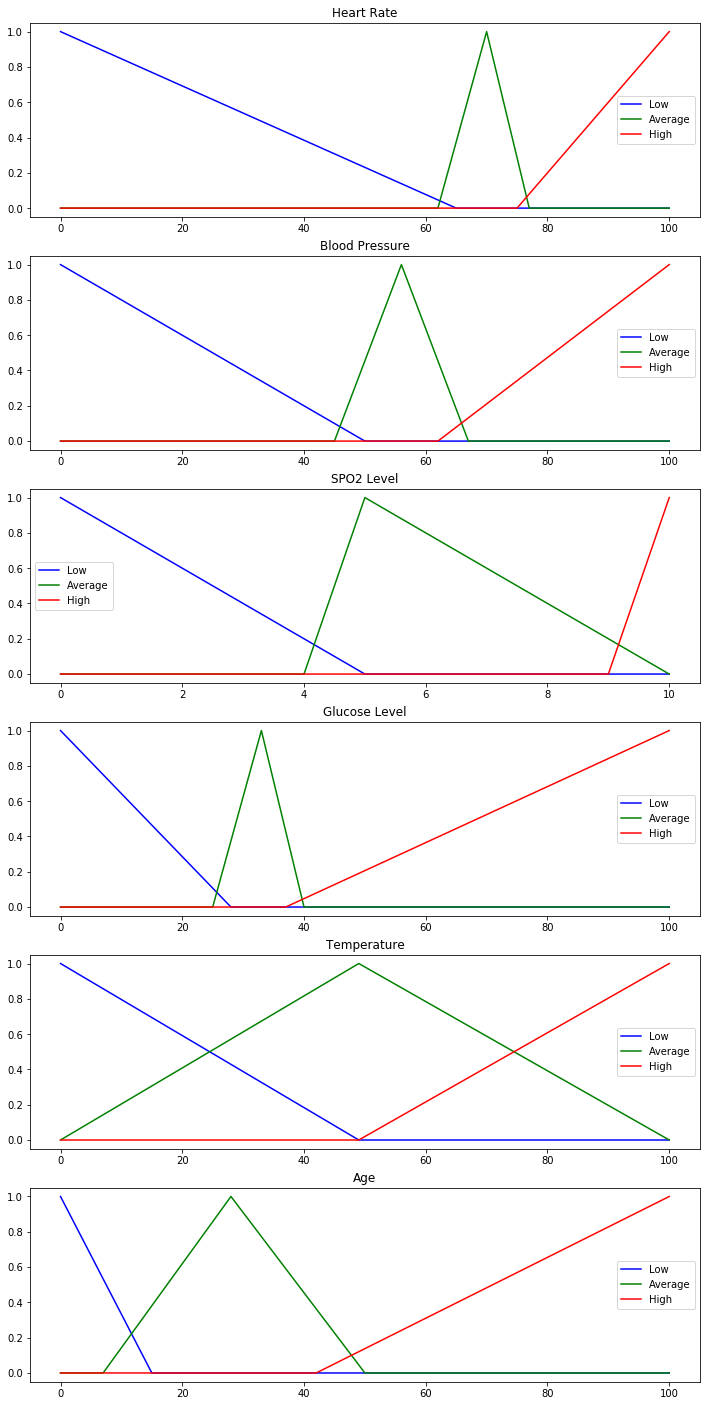

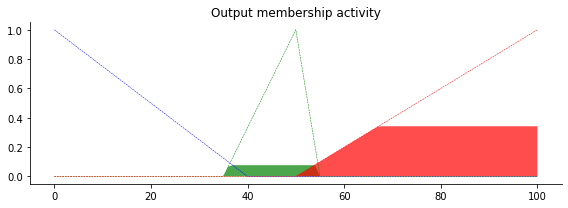

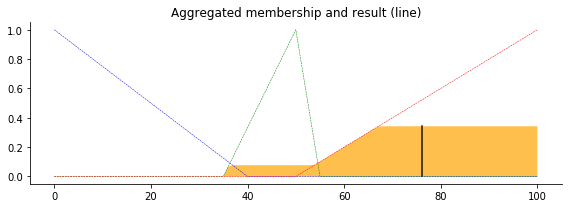

In [169]:
## Execute all functions
fuzzy(60, 75, 9, 55, 45, 65)